## Import related functions

In [1]:
import sys
sys.path.append(r'./script/')
from get_dataset_and_analysis import *

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Gzip xml

In [6]:
# !gunzip -c ./basic_data/uniprot_sprot.xml.gz > ./basic_data/uniprot_sprot_xml

### input and output file

In [5]:
# mkdir data_folder & figures_folder
data_folder = "./DATA"
figures_folder = os.path.join(data_folder, "figures")

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

In [6]:
basic_data_folder = "./basic_data"
xml_file = './basic_data/uniprot_sprot_xml'

uniprot_data_file = os.path.join(data_folder, "uniprot_sprot_data.feather")
dataset_outfile = os.path.join(data_folder, "Dataset_0724_new.csv")

subunit_num_distribution_png = os.path.join(data_folder, "figures", "subunit_num_distribution_reviewed_0725.png")
label_length_distribution_png = os.path.join(data_folder, "figures", "label_length_distribution_reviewed_0725.png")

organsim_file = os.path.join(basic_data_folder, "uniprotkb_AND_reviewed_true_2024_01_09.tsv")
entry_EC_file = os.path.join(basic_data_folder, "Entry-EC-reviewed.tsv")
ec_subunit_num_ratio_png = os.path.join(data_folder, "figures", "ec_subunit_num_ratio_0725.png")
ec_subunit_num_heatmap_png = os.path.join(data_folder, "figures", "ec_subunit_num_heatmap_0725.png")
distribution_among_species_png = os.path.join(data_folder, "figures", "distribution_among_species_0725.png")

### Anlysis data from xml

In [5]:
uniprot_data =  analysis_uniprot_xml(xml_file, uniprot_data_file)

0it [00:00, ?it/s]

570420it [10:39, 891.32it/s] 
570420it [03:46, 2516.10it/s]


### Preprocessing data

In [10]:
get_dataset_from_uniprot(uniprot_data, dataset_outfile)

all_data: 570420
Filtered out empty data: 291467
Removed ECO:0000250 without PubMed reference: 220276
Extracting 10 subunit labels: 101801
Filtered out data containing "(By similarity)", "(Probable)", or "(Potential)": 101447


/home/linjw/BioML/reDeepSub/./script/get_dataset_and_analysis.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  uniprot_data = uniprot_data[~uniprot_data['Subunit structure'].str.contains('(By similarity)|(Probable)|(Potential)')]


Extracted data containing keywords: 96324
Done
(96324, 3)


### Dataset distribution

<Figure size 3000x2400 with 0 Axes>

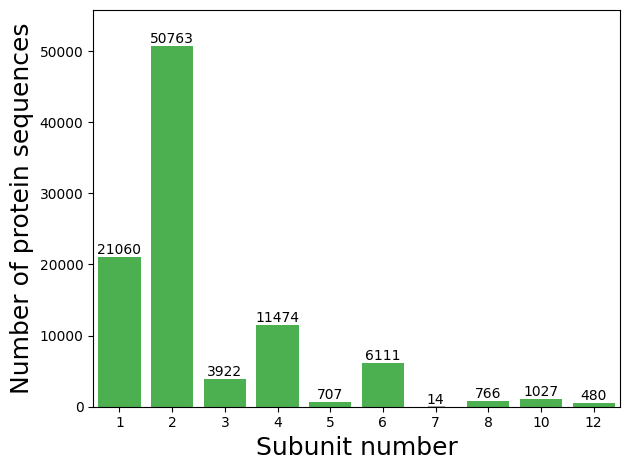

In [16]:
get_dataset_distribution(uniprot_data, subunit_num_distribution_png)

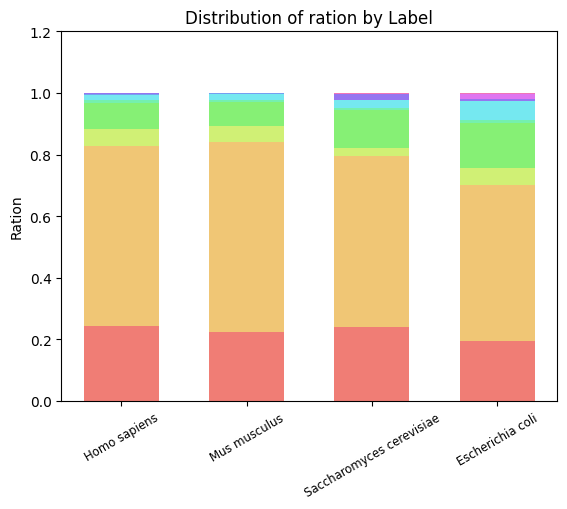

In [18]:
get_distribution_among_species(uniprot_data,distribution_among_species_png)

### label-length

<Figure size 3000x2400 with 0 Axes>

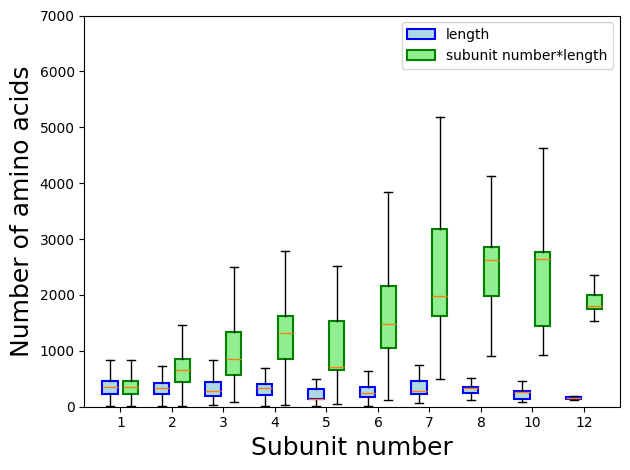

In [33]:
get_label_length_distribution(uniprot_data, label_length_distribution_png)

### EC分布

/home/dengrui/DeepSub/commit/DeepSub/./script/get_dataset_and_analysis.py:453: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_data.rename(columns={'label': 'uniprot_label'}, inplace=True)


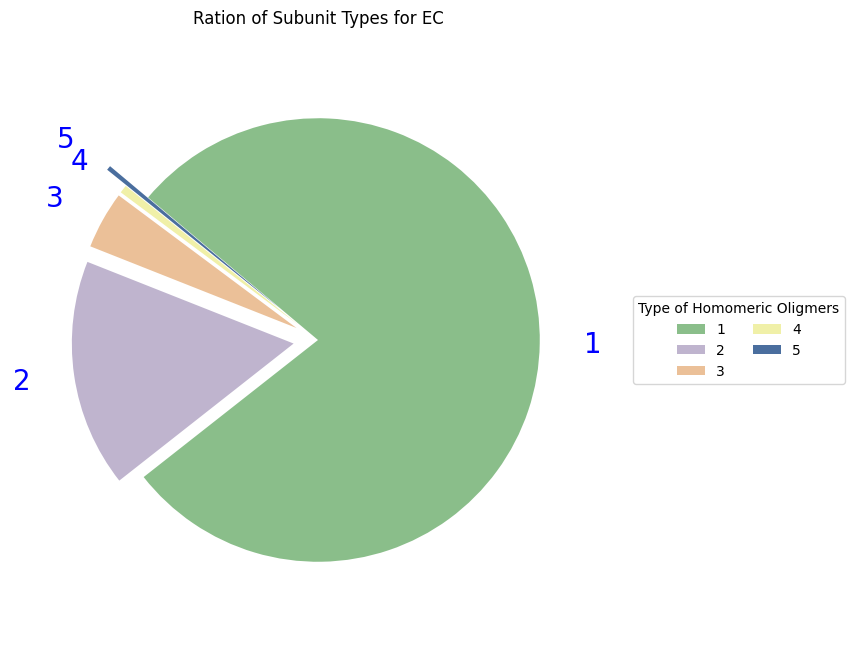

In [7]:
get_ec_subunit_num_ratio(uniprot_data,ec_subunit_num_ratio_png)

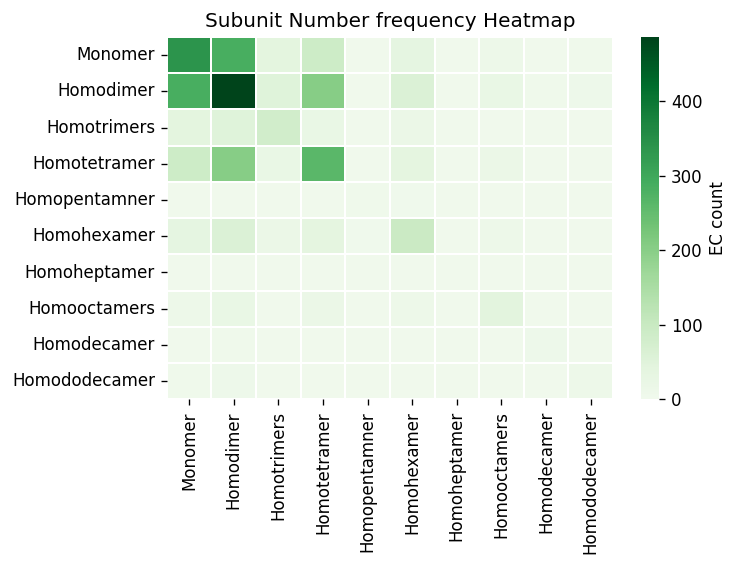

In [15]:
get_ec_subunit_num_heatmap(uniprot_data,ec_subunit_num_heatmap_png)